<a href="https://colab.research.google.com/github/aleja-k/INCOR/blob/master/SECOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Analisis Secop**

*Karen Perdomo

# **Cargue de dataframe**

In [2]:
# Importar Librerias a usar dentro del proceso de analisis y graficacion.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
import re

***Nota: El repositorio en Github debe ser público para que pueda interactuar con pandas de lo contrario no es posible obtener la información.***

In [3]:
url="https://raw.githubusercontent.com/aleja-k/PandasSecop/master/SECOP_exported_1.csv" # URL
#df=pd.read_csv(url,index_col="Unnamed: 0")
df= pd.read_csv(url, encoding= "utf-8",sep=';') # Encoding segun el tipo del csv y separador ;
df.head(10)

,Id,DESCRIPCION,NUMERO_PROCESO,ESTADO,TIPO_PROCESO,UNIDAD_CONTRATACION,VALOR_ESTIMADO,ENTIDAD_ESTATAL,FASE_ACTUAL,FECHA_PUBLICACION,FECHA_OFERTAS,CODIGO_NOTICE,FECHA_PRESENTACION,TIPO_CONTRATO,JUSTIFICACION_CONTRATO,DESCRIPCION_CONTRATO,FECHA_TERMINACION,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC
0,2080,HSAM-330-INGENIERIA VITAL S.A.S,330 DE 2024,Publicado,Contratación régimen especial,OFICINA DE GESTION JURIDICA Y CONTRATACION,297000000,E.S.E. HOSPITAL SAN ANTONIO,Presentación de oferta,5 días de tiempo transcurrido (9/02/2024 6:10:...,NaN,CO1.NTC.5631144,-,Decreto 092 de 2017,Decreto 092 de 2017,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,"31/12/2024 12:00:00 PM ((UTC-05:00) Bogotá, Li...",200000000,85161500 - Reparación de equipo médico o quirú...
1,2081,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 86 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:46...,NaN,CO1.NTC.5625612,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"20/12/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",85800000,80101500 - Servicios de consultoría de negocio...
2,2082,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 83 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,46800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:31...,NaN,CO1.NTC.5625188,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"11/08/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",46800000,80101500 - Servicios de consultoría de negocio...
3,2083,Prestar servicios profesionales en el habilita...,DIRECTA 120-2024,Proceso adjudicado y celebrado,Contratación régimen especial,Grupo de Gestion Juridica y Contractual,51380467,UNIDAD DE PLANEACION MINERO ENERGETICO,Presentación de oferta,6 días de tiempo transcurrido (8/02/2024 4:18:...,NaN,CO1.NTC.5619877,-,Prestación de servicios,Regla aplicable,Prestar servicios profesionales en el habilita...,"30/12/2024 12:00:00 PM ((UTC-05:00) Bogotá, Li...",60208434,80111620 - Servicios temporales de recursos hu...
4,2084,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 85 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,7 días de tiempo transcurrido (7/02/2024 3:25:...,NaN,CO1.NTC.5609851,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"20/12/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",85800000,80101500 - Servicios de consultoría de negocio...
5,2085,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 84 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,46800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,7 días de tiempo transcurrido (7/02/2024 2:47:...,NaN,CO1.NTC.5609079,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"6/08/2024 11:59:00 PM ((UTC-05:00) Bogotá, Lim...",46800000,80101500 - Servicios de consultoría de negocio...
6,2086,JEHISON DAVID CIFUENTES CORTES,104772,Proceso adjudicado y celebrado,Contratación directa.,DIRECCION DE CONTRATACION,24600000,SECRETARIA DISTRITAL DE GOBIERNO 1,Presentación de oferta,9 días de tiempo transcurrido (5/02/2024 3:45:...,NaN,CO1.NTC.5590960,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,PRESTAR LOS SERVICIOS PROFESIONALES EN LA SECR...,"5/06/2024 11:00:00 PM ((UTC-05:00) Bogotá, Lim...",24600000,80111600 - Servicios de personal temporal
7,2087,DIMPE_MERCADO_2024_GEIH_BT_TH_Prestación de se...,EDP-325-2024,Proceso adjudicado y celebrado,Contratación directa.,SECRETARIA GEN

## **Analisis de primera instancia del Dataframe**

In [4]:
df.columns # Nombre de las columnas del Dataframe

Index(['Id', 'DESCRIPCION', 'NUMERO_PROCESO', 'ESTADO', 'TIPO_PROCESO',
       'UNIDAD_CONTRATACION', 'VALOR_ESTIMADO', 'ENTIDAD_ESTATAL',
       'FASE_ACTUAL', 'FECHA_PUBLICACION', 'FECHA_OFERTAS', 'CODIGO_NOTICE',
       'FECHA_PRESENTACION', 'TIPO_CONTRATO', 'JUSTIFICACION_CONTRATO',
       'DESCRIPCION_CONTRATO', 'FECHA_TERMINACION',
       'VALOR_ESTIMADO_ADQUISICIONES', 'CODIGO_UNSPSC'],
      dtype='object')

In [5]:
df.info() # Informacion de registros y tipo de variable de cada una de las columnas del DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            110 non-null    int64  
 1   DESCRIPCION                   110 non-null    object 
 2   NUMERO_PROCESO                110 non-null    object 
 3   ESTADO                        110 non-null    object 
 4   TIPO_PROCESO                  110 non-null    object 
 5   UNIDAD_CONTRATACION           110 non-null    object 
 6   VALOR_ESTIMADO                110 non-null    object 
 7   ENTIDAD_ESTATAL               110 non-null    object 
 8   FASE_ACTUAL                   110 non-null    object 
 9   FECHA_PUBLICACION             110 non-null    object 
 10  FECHA_OFERTAS                 0 non-null      float64
 11  CODIGO_NOTICE                 110 non-null    object 
 12  FECHA_PRESENTACION            110 non-null    object 
 13  TIPO_

**Cercion de  la edad y las fechas a los tipos int y date**

In [6]:
# Convertir la columna 'CODIGO_UNSPSC' a tipo cadena
df['CODIGO_UNSPSC'] = df['CODIGO_UNSPSC'].astype(str)

# Reemplazar letras y caracteres especiales por nada (eliminarlos)
df['CODIGO_UNSPSC'] = df['CODIGO_UNSPSC'].str.replace('[^0-9]', '', regex=True)

# Convertir la columna 'CODIGO_UNSPSC' a numérica
df["CODIGO_UNSPSC"] = pd.to_numeric(df['CODIGO_UNSPSC'], errors="coerce")

# Mostrar las primeras 3 filas del DataFrame resultante
df.head(3)



,Id,DESCRIPCION,NUMERO_PROCESO,ESTADO,TIPO_PROCESO,UNIDAD_CONTRATACION,VALOR_ESTIMADO,ENTIDAD_ESTATAL,FASE_ACTUAL,FECHA_PUBLICACION,FECHA_OFERTAS,CODIGO_NOTICE,FECHA_PRESENTACION,TIPO_CONTRATO,JUSTIFICACION_CONTRATO,DESCRIPCION_CONTRATO,FECHA_TERMINACION,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC
0,2080,HSAM-330-INGENIERIA VITAL S.A.S,330 DE 2024,Publicado,Contratación régimen especial,OFICINA DE GESTION JURIDICA Y CONTRATACION,297000000,E.S.E. HOSPITAL SAN ANTONIO,Presentación de oferta,5 días de tiempo transcurrido (9/02/2024 6:10:...,NaN,CO1.NTC.5631144,-,Decreto 092 de 2017,Decreto 092 de 2017,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,"31/12/2024 12:00:00 PM ((UTC-05:00) Bogotá, Li...",200000000,85161500
1,2081,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 86 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:46...,NaN,CO1.NTC.5625612,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"20/12/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",85800000,80101500
2,2082,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 83 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,46800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:31...,NaN,CO1.NTC.5625188,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"11/08/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",46800000,80101500


***Nota: En el caso de que existan diferentes tipos de datos al numérico se utliza el errors="coerce" y los deja como NaN***


In [7]:
#df1=df Transofrmacion a formato fecha de la fecha incidente
df['FECHA_PRESENTACION']=pd.to_datetime(df['FECHA_PRESENTACION'], errors="coerce")
df.head(3)

<ipython-input-7-37c78a5d8500>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FECHA_PRESENTACION']=pd.to_datetime(df['FECHA_PRESENTACION'], errors="coerce")


,Id,DESCRIPCION,NUMERO_PROCESO,ESTADO,TIPO_PROCESO,UNIDAD_CONTRATACION,VALOR_ESTIMADO,ENTIDAD_ESTATAL,FASE_ACTUAL,FECHA_PUBLICACION,FECHA_OFERTAS,CODIGO_NOTICE,FECHA_PRESENTACION,TIPO_CONTRATO,JUSTIFICACION_CONTRATO,DESCRIPCION_CONTRATO,FECHA_TERMINACION,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC
0,2080,HSAM-330-INGENIERIA VITAL S.A.S,330 DE 2024,Publicado,Contratación régimen especial,OFICINA DE GESTION JURIDICA Y CONTRATACION,297000000,E.S.E. HOSPITAL SAN ANTONIO,Presentación de oferta,5 días de tiempo transcurrido (9/02/2024 6:10:...,NaN,CO1.NTC.5631144,NaT,Decreto 092 de 2017,Decreto 092 de 2017,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,"31/12/2024 12:00:00 PM ((UTC-05:00) Bogotá, Li...",200000000,85161500
1,2081,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 86 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:46...,NaN,CO1.NTC.5625612,NaT,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"20/12/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",85800000,80101500
2,2082,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 83 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,46800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:31...,NaN,CO1.NTC.5625188,NaT,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"11/08/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",46800000,80101500


In [8]:
df['FECHA_TERMINACION']=pd.to_datetime(df['FECHA_TERMINACION'], errors="coerce")
df.head(3)

<ipython-input-8-f5ac581b5303>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FECHA_TERMINACION']=pd.to_datetime(df['FECHA_TERMINACION'], errors="coerce")


,Id,DESCRIPCION,NUMERO_PROCESO,ESTADO,TIPO_PROCESO,UNIDAD_CONTRATACION,VALOR_ESTIMADO,ENTIDAD_ESTATAL,FASE_ACTUAL,FECHA_PUBLICACION,FECHA_OFERTAS,CODIGO_NOTICE,FECHA_PRESENTACION,TIPO_CONTRATO,JUSTIFICACION_CONTRATO,DESCRIPCION_CONTRATO,FECHA_TERMINACION,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC
0,2080,HSAM-330-INGENIERIA VITAL S.A.S,330 DE 2024,Publicado,Contratación régimen especial,OFICINA DE GESTION JURIDICA Y CONTRATACION,297000000,E.S.E. HOSPITAL SAN ANTONIO,Presentación de oferta,5 días de tiempo transcurrido (9/02/2024 6:10:...,NaN,CO1.NTC.5631144,NaT,Decreto 092 de 2017,Decreto 092 de 2017,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,NaT,200000000,85161500
1,2081,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 86 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:46...,NaN,CO1.NTC.5625612,NaT,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,NaT,85800000,80101500
2,2082,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 83 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,46800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:31...,NaN,CO1.NTC.5625188,NaT,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,NaT,46800000,80101500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Id                            110 non-null    int64         
 1   DESCRIPCION                   110 non-null    object        
 2   NUMERO_PROCESO                110 non-null    object        
 3   ESTADO                        110 non-null    object        
 4   TIPO_PROCESO                  110 non-null    object        
 5   UNIDAD_CONTRATACION           110 non-null    object        
 6   VALOR_ESTIMADO                110 non-null    object        
 7   ENTIDAD_ESTATAL               110 non-null    object        
 8   FASE_ACTUAL                   110 non-null    object        
 9   FECHA_PUBLICACION             110 non-null    object        
 10  FECHA_OFERTAS                 0 non-null      float64       
 11  CODIGO_NOTICE                 11

## **Dimensiones del Dataframe y limpieza**

In [10]:
df.isnull().sum() # Hallar la cantidad de nulos por columna del DF

Id                                0
DESCRIPCION                       0
NUMERO_PROCESO                    0
ESTADO                            0
TIPO_PROCESO                      0
UNIDAD_CONTRATACION               0
VALOR_ESTIMADO                    0
ENTIDAD_ESTATAL                   0
FASE_ACTUAL                       0
FECHA_PUBLICACION                 0
FECHA_OFERTAS                   110
CODIGO_NOTICE                     0
FECHA_PRESENTACION              110
TIPO_CONTRATO                     1
JUSTIFICACION_CONTRATO            1
DESCRIPCION_CONTRATO              0
FECHA_TERMINACION               110
VALOR_ESTIMADO_ADQUISICIONES      0
CODIGO_UNSPSC                     0
dtype: int64

In [11]:
row=df.shape[0] # Tamaño de las filas
column=df.shape[1] # Tamaño de las columnas
size= row*column
print(size)

2090


In [12]:
nulos=df.isnull().sum().sum() # Suma los valores nulos

In [13]:
NaN_Porcentage= (nulos/size)*100 #porcentaje de numeros nulos
NaN_Porcentage

15.885167464114833

***Nota: Por efectos de aleración en la base de datos no vamos a realizar la eliminacion de los NaN por la importancia de las variables a nivel de estudio.***

## **Generacion de nuevas columnas**

In [14]:
"""licita=df.loc[1,"FECHA_PUBLICACION"]
SECOP = df.loc[1,'FECHA_PRESENTACION']
res= round(abs((SECOP-licita).total_seconds() /60),2)
res"""


'licita=df.loc[1,"FECHA_PUBLICACION"]\nSECOP = df.loc[1,\'FECHA_PRESENTACION\']\nres= round(abs((SECOP-licita).total_seconds() /60),2)\nres'

In [15]:
 # Se extrae la fecha de publicación

df['FECHA_PUBLICACION'] = df['FECHA_PUBLICACION'].astype(str).apply(lambda x: re.search(r'\d+/\d+/\d+', x).group() if re.search(r'\d+/\d+/\d+', x) else None)
print(df['FECHA_PUBLICACION'])



0      9/02/2024
1      9/02/2024
2      9/02/2024
3      8/02/2024
4      7/02/2024
         ...    
105    9/04/2024
106    9/04/2024
107    9/04/2024
108    8/04/2024
109    5/04/2024
Name: FECHA_PUBLICACION, Length: 110, dtype: object


In [16]:
df['FECHA_PRESENTACION'] = df['FECHA_PRESENTACION'].astype(str).apply(lambda x: re.search(r'\d+/\d+/\d+', x).group() if re.search(r'\d+/\d+/\d+', x) else None)
print(df['FECHA_PRESENTACION'])


0      None
1      None
2      None
3      None
4      None
       ... 
105    None
106    None
107    None
108    None
109    None
Name: FECHA_PRESENTACION, Length: 110, dtype: object


In [17]:
# Se recorre todo el DF para asi comparar las fechas y extraer la diferencia de entre la publicación de la oferta y la fecha de presentación
for i in range(row):
    licita = df.loc[i, "FECHA_PUBLICACION"]
    SECOP = df.loc[i, 'FECHA_PRESENTACION']

    if licita is not None and SECOP is not None:
        licita = pd.to_datetime(licita)  # Convertir a datetime si no lo está
        SECOP = pd.to_datetime(SECOP)    # Convertir a datetime si no lo está
        res = round(abs((licita - SECOP).total_seconds() / 60), 2)
        df.loc[i, "MINUTOS_INICIO_OFERTA"] = res
    else:
        df.loc[i, "MINUTOS_INICIO_OFERTA"] = None

df


,Id,DESCRIPCION,NUMERO_PROCESO,ESTADO,TIPO_PROCESO,UNIDAD_CONTRATACION,VALOR_ESTIMADO,ENTIDAD_ESTATAL,FASE_ACTUAL,FECHA_PUBLICACION,FECHA_OFERTAS,CODIGO_NOTICE,FECHA_PRESENTACION,TIPO_CONTRATO,JUSTIFICACION_CONTRATO,DESCRIPCION_CONTRATO,FECHA_TERMINACION,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC,MINUTOS_INICIO_OFERTA
0,2080,HSAM-330-INGENIERIA VITAL S.A.S,330 DE 2024,Publicado,Contratación régimen especial,OFICINA DE GESTION JURIDICA Y CONTRATACION,297000000,E.S.E. HOSPITAL SAN ANTONIO,Presentación de oferta,9/02/2024,NaN,CO1.NTC.5631144,None,Decreto 092 de 2017,Decreto 092 de 2017,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,NaT,200000000,85161500,NaN
1,2081,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 86 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,9/02/2024,NaN,CO1.NTC.5625612,None,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,NaT,85800000,80101500,NaN
2,2082,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 83 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,46800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,9/02/2024,NaN,CO1.NTC.5625188,None,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,NaT,46800000,80101500,NaN
3,2083,Prestar servicios profesionales en el habilita...,DIRECTA 120-2024,Proceso adjudicado y celebrado,Contratación régimen especial,Grupo de Gestion Juridica y Contractual,51380467,UNIDAD DE PLANEACION MINERO ENERGETICO,Presentación de oferta,8/02/2024,NaN,CO1.NTC.5619877,None,Prestación de servicios,Regla aplicable,Prestar servicios profesionales en el habilita...,NaT,60208434,80111620,NaN
4,2084,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 85 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,7/02/2024,NaN,CO1.NTC.5609851,None,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,NaT,85800000,80101500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,62,PRESTACIÓN DE SERVICIOS PROFESIONALES A LA SUB...,CD 159 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,GRUPO CONTRATOS CORPAMAG,21000000,Presentación de oferta,CORPORACION AUTONOMA REGIONAL DEL MAGDALENA,9/04/2024,NaN,CO1.NTC.5953699,None,Prestación de servicios,Servicios profesionales y apoyo a la gestión,"9/10/2024 11:00:00 PM ((UTC-05:00) Bogotá, Lim...",NaT,0,80101500,NaN
106,63,PRESTACIÓN DE SERVICIOS PROFESIONALES A CORPAM...,CD 157 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,GRUPO CONTRATOS CORPAMAG,24000000,Presentación de oferta,CORPORACION AUTONOMA REGIONAL DEL MAGDALENA,9/04/2024,NaN,CO1.NTC.5953644,None,Prestación de servicios,Servicios profesionales y apoyo a la gestión,"9/10/2024 11:00:00 PM ((UTC-05:00) Bogotá, Lim...",NaT,0,80101500,NaN
107,64,LUIS DANIEL LOPEZ TORRES,ODS-036-2024,Publicado,Contratación régimen especial,JURIDICA,300000,Presentación de oferta,E.S.E HOSPITAL 7 DE AGOSTO,9/04/2024,NaN,CO1.NTC.5952804,None,Prestación de servicios,Regla aplicable,"29/02/2024 12:00:00 PM ((UTC-05:00) Bogotá, Li...",NaT,0,80111600,NaN
108,65,RENOVACIÓN PLATAFORMA AMAZON WEB SERVICES,114-2024,Publicado,Contratación régimen especial,UNIDAD DE CONTRATACION,7500000,Presentación de oferta,EMPRESA MUNICIPAL DE SERVICIOS PUBLICOS DE ARA...,8/04/2024,NaN,CO1.NTC.5946435,None,Prestación de servicios,Regla aplicable,14 días de tiempo transcurrido (17/04/2024 11:...,NaT,7500000,81111500,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Id                            110 non-null    int64         
 1   DESCRIPCION                   110 non-null    object        
 2   NUMERO_PROCESO                110 non-null    object        
 3   ESTADO                        110 non-null    object        
 4   TIPO_PROCESO                  110 non-null    object        
 5   UNIDAD_CONTRATACION           110 non-null    object        
 6   VALOR_ESTIMADO                110 non-null    object        
 7   ENTIDAD_ESTATAL               110 non-null    object        
 8   FASE_ACTUAL                   110 non-null    object        
 9   FECHA_PUBLICACION             110 non-null    object        
 10  FECHA_OFERTAS                 0 non-null      float64       
 11  CODIGO_NOTICE                 11

In [19]:
df.describe()

,Id,FECHA_OFERTAS,FECHA_TERMINACION,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC,MINUTOS_INICIO_OFERTA
count,110.000000,0.0,0,1.100000e+02,1.100000e+02,0.0
mean,863.100000,NaN,NaT,1.679384e+09,7.899828e+07,NaN
min,1.000000,NaN,NaT,0.000000e+00,4.322260e+07,NaN
25%,28.250000,NaN,NaT,0.000000e+00,8.010401e+07,NaN
50%,55.500000,NaN,NaT,5.709845e+07,8.011160e+07,NaN
75%,2095.750000,NaN,NaT,3.420000e+08,8.011170e+07,NaN
max,2213.000000,NaN,NaT,9.000000e+10,9.315150e+07,NaN
std,1020.970279,NaN,NaN,8.858140e+09,7.599516e+06,NaN


## **Agrupamiento mulltiple y filtros**

In [20]:
df.columns

Index(['Id', 'DESCRIPCION', 'NUMERO_PROCESO', 'ESTADO', 'TIPO_PROCESO',
       'UNIDAD_CONTRATACION', 'VALOR_ESTIMADO', 'ENTIDAD_ESTATAL',
       'FASE_ACTUAL', 'FECHA_PUBLICACION', 'FECHA_OFERTAS', 'CODIGO_NOTICE',
       'FECHA_PRESENTACION', 'TIPO_CONTRATO', 'JUSTIFICACION_CONTRATO',
       'DESCRIPCION_CONTRATO', 'FECHA_TERMINACION',
       'VALOR_ESTIMADO_ADQUISICIONES', 'CODIGO_UNSPSC',
       'MINUTOS_INICIO_OFERTA'],
      dtype='object')

In [21]:
#df.groupby(['TIPO_PROCESO'])[['MINUTOS_INICIO_OFERTA']].value_counts()
df['TIPO_PROCESO']=df['TIPO_PROCESO'].str.upper()
df['TIPO_PROCESO'].value_counts()

TIPO_PROCESO
CONTRATACIÓN DIRECTA.                         78
CONTRATACIÓN RÉGIMEN ESPECIAL                 27
LICITACIÓN PÚBLICA (OBRA PÚBLICA)              2
SOLICITUD DE INFORMACIÓN A LOS PROVEEDORES     1
LICITACIÓN PÚBLICA                             1
CONTRATACIÓN DIRECTA (CON OFERTAS)             1
Name: count, dtype: int64

In [22]:
df['ESTADO']=df['ESTADO'].str.upper()# Dejar los datos en mayusculas
df['ESTADO'].value_counts() # Ver la clasificacion por cada diferencia de informacion en la columna y contarlos

ESTADO
PROCESO ADJUDICADO Y CELEBRADO           82
PUBLICADO                                24
PROCESO EN EVALUACIÓN Y OBSERVACIONES     4
Name: count, dtype: int64

In [23]:
df['UNIDAD_CONTRATACION']=df['UNIDAD_CONTRATACION'].str.upper()
df['UNIDAD_CONTRATACION'].value_counts()

UNIDAD_CONTRATACION
GRUPO CONTRATOS CORPAMAG                                             13
SECRETARIA DEL INTERIOR                                              12
SECRETARIA GENERAL - DANE CENTRAL                                    10
SECRETARIA GENERAL                                                    8
JURIDICA                                                              5
SUBDIRECCION ADMINISTRATIVA                                           4
BPP                                                                   4
SECRETARÍA DE EDUCACIÓN                                               3
GESTIÓN DE LA CONTRATACIÓN                                            3
DIRECCION DE CONTRATACION                                             3
GESTIÓN CONTRACTUAL 2024                                              2
MEDELLIN NIVEL CENTRAL                                                2
CONTRACION DADII 2024                                                 2
SUBDIRECCION DE GESTION CONTRACTUAL         

In [24]:
df['DESCRIPCION_CONTRATO']=df['DESCRIPCION_CONTRATO'].str.upper()
df['DESCRIPCION_CONTRATO']=df['DESCRIPCION_CONTRATO'].str.replace('^ ','',regex=False)# Eliminar espacios al inicio de cada uno de los datos
df['DESCRIPCION_CONTRATO'].value_counts()

DESCRIPCION_CONTRATO
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     15
PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS PARA EL FORTALECIMIENTO DEL MODELO DE OPERACIÓN INTERNO DE LA DIRECCIÓN DE TECNOLOGÍA DE LA INFORMACIÓN Y LAS COMUNICACIONES EN EL CICLO DE MEJORA CONTINUA Y MANTENIMIENTO EVOLUTIVO SOBRE LOS PROCESOS AUTOMATIZADOS EN LA HERRAMIENTA BPM AURA PORTAL.                                                                                                                                                                                   

In [25]:
df['TIPO_PROCESO'] = df['TIPO_PROCESO'].str.upper()
df['TIPO_PROCESO'] = df['TIPO_PROCESO'].str.replace('^ ', '', regex=False)  # Eliminar espacios al inicio de cada uno de los datos
df['TIPO_PROCESO'].value_counts()


TIPO_PROCESO
CONTRATACIÓN DIRECTA.                         78
CONTRATACIÓN RÉGIMEN ESPECIAL                 27
LICITACIÓN PÚBLICA (OBRA PÚBLICA)              2
SOLICITUD DE INFORMACIÓN A LOS PROVEEDORES     1
LICITACIÓN PÚBLICA                             1
CONTRATACIÓN DIRECTA (CON OFERTAS)             1
Name: count, dtype: int64

In [26]:

df['TIPO_CONTRATO'].value_counts()

TIPO_CONTRATO
Prestación de servicios    96
Decreto 092 de 2017         7
Otro                        3
Obra                        2
Compraventa                 1
Name: count, dtype: int64

In [27]:
#df['CODIGO_UNSPSC'] = df['CODIGO_UNSPSC'].str.replace('[a-zA-ZáéíóúÁÉÍÓÚñÑ\s-]', '', regex=True)

 #Remplazo de valores

In [28]:
df['CODIGO_UNSPSC'].value_counts()

CODIGO_UNSPSC
80111600    39
80101500    17
80111500    12
81111500     8
81112200     5
80111701     3
72101500     3
81111504     2
93141500     1
80161500     1
72154100     1
81141500     1
85161500     1
81141902     1
43231500     1
43222600     1
72103300     1
43231600     1
80111608     1
81112213     1
84111600     1
72101507     1
93141702     1
80101509     1
43232202     1
81111508     1
86101601     1
80111620     1
93151500     1
Name: count, dtype: int64

In [29]:
df['FECHA_OFERTAS'].value_counts()

Series([], Name: count, dtype: int64)

In [30]:
df['FECHA_OFERTAS'] = df['FECHA_OFERTAS'].replace('0', 'SIN_DATO', limit=0)


 #Remplazo de valores

In [31]:
df['FECHA_OFERTAS'].value_counts()

Series([], Name: count, dtype: int64)

In [32]:
df['VALOR_ESTIMADO'].str.replace(',', '.')


0      297000000
1       85800000
2       46800000
3       51380467
4       85800000
         ...    
105     21000000
106     24000000
107       300000
108      7500000
109     38934000
Name: VALOR_ESTIMADO, Length: 110, dtype: object

Generación de filtros con respecto al si licita o no la entidad en SECOP esta se utiliza para generar las gráficas que se encuentran dentro del estudio de este dataframe en la seccion de graficacion


In [33]:
#Casos_licita = df.loc['FECHA_OFERTAS']

In [34]:
#Casos_licita=Casos_licita.reset_index(drop = True) # Reordenamos el DF
#Casos_licita.head()

## **Creacion de un nuevo dataframe**

In [35]:
SECOP = df[['NUMERO_PROCESO','TIPO_PROCESO','VALOR_ESTIMADO','FECHA_PUBLICACION','FECHA_PRESENTACION','DESCRIPCION_CONTRATO','CODIGO_UNSPSC']] # Creo nuevo df basado en las anteriores columnas
#SECOP = SECOP[SECOP['TIPO_PROCESO'].str.contains('CONTRATACIÓN RÉGIMEN ESPECIAL|LICITACIÓN PÚBLICA \(OBRA PÚBLICA\)', case=False, na=False)]
SECOP=SECOP.reset_index(drop = True)
SECOP.to_excel('SECOP.xlsx', index=False)
SECOP



,NUMERO_PROCESO,TIPO_PROCESO,VALOR_ESTIMADO,FECHA_PUBLICACION,FECHA_PRESENTACION,DESCRIPCION_CONTRATO,CODIGO_UNSPSC
0,330 DE 2024,CONTRATACIÓN RÉGIMEN ESPECIAL,297000000,9/02/2024,None,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,85161500
1,CONTRATO 86 DE 2024,CONTRATACIÓN DIRECTA.,85800000,9/02/2024,None,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,80101500
2,CONTRATO 83 DE 2024,CONTRATACIÓN DIRECTA.,46800000,9/02/2024,None,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,80101500
3,DIRECTA 120-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,51380467,8/02/2024,None,PRESTAR SERVICIOS PROFESIONALES EN EL HABILITA...,80111620
4,CONTRATO 85 DE 2024,CONTRATACIÓN DIRECTA.,85800000,7/02/2024,None,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,80101500
...,...,...,...,...,...,...,...
105,CD 159 DE 2024,CONTRATACIÓN DIRECTA.,21000000,9/04/2024,None,"9/10/2024 11:00:00 PM ((UTC-05:00) BOGOTÁ, LIM...",80101500
106,CD 157 DE 2024,CONTRATACIÓN DIRECTA.,24000000,9/04/2024,None,"9/10/2024 11:00:00 PM ((UTC-05:00) BOGOTÁ, LIM...",80101500
107,ODS-036-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,300000,9/04/2024,None,"29/02/2024 12:00:00 PM ((UTC-05:00) BOGOTÁ, LI...",80111600
108,114-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,7500000,8/04/2024,None,14 DÍAS DE TIEMPO TRANSCURRIDO (17/04/2024 11:...,81111500


### **Filtro 2**

In [36]:
Respuesta_Licita=df.groupby(["TIPO_PROCESO"])[["MINUTOS_INICIO_OFERTA"]].mean() # Agrupa la columna que desea
Respuesta_Licita

,MINUTOS_INICIO_OFERTA
TIPO_PROCESO,
CONTRATACIÓN DIRECTA (CON OFERTAS),NaN
CONTRATACIÓN DIRECTA.,NaN
CONTRATACIÓN RÉGIMEN ESPECIAL,NaN
LICITACIÓN PÚBLICA,NaN
LICITACIÓN PÚBLICA (OBRA PÚBLICA),NaN
SOLICITUD DE INFORMACIÓN A LOS PROVEEDORES,NaN


In [37]:
Respuesta_Licita=Respuesta_Licita.rename_axis("TIPO_PROCESO").reset_index() # Modifica el dataframe generando la columna de director y generando un index
Respuesta_Licita

,TIPO_PROCESO,MINUTOS_INICIO_OFERTA
0,CONTRATACIÓN DIRECTA (CON OFERTAS),NaN
1,CONTRATACIÓN DIRECTA.,NaN
2,CONTRATACIÓN RÉGIMEN ESPECIAL,NaN
3,LICITACIÓN PÚBLICA,NaN
4,LICITACIÓN PÚBLICA (OBRA PÚBLICA),NaN
5,SOLICITUD DE INFORMACIÓN A LOS PROVEEDORES,NaN


In [38]:
union = pd.merge(SECOP, Respuesta_Licita) # Union de Dataframes A traves del Merge
union


,NUMERO_PROCESO,TIPO_PROCESO,VALOR_ESTIMADO,FECHA_PUBLICACION,FECHA_PRESENTACION,DESCRIPCION_CONTRATO,CODIGO_UNSPSC,MINUTOS_INICIO_OFERTA
0,330 DE 2024,CONTRATACIÓN RÉGIMEN ESPECIAL,297000000,9/02/2024,None,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,85161500,NaN
1,DIRECTA 120-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,51380467,8/02/2024,None,PRESTAR SERVICIOS PROFESIONALES EN EL HABILITA...,80111620,NaN
2,268496,CONTRATACIÓN RÉGIMEN ESPECIAL,47740000,26/01/2024,None,PRESTACIÓN DE SERVICIOS PROFESIONALES PARA ACT...,86101601,NaN
3,5384-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,48463093,26/01/2024,None,PRESTACIÓN DE SERVICIOS PROFESIONALES PARA EL ...,80111701,NaN
4,5383-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,48463093,25/01/2024,None,PRESTACIÓN DE SERVICIOS PROFESIONALES PARA EL\...,80111701,NaN
...,...,...,...,...,...,...,...,...
105,Solicitud de Cotización 004 de 2024,SOLICITUD DE INFORMACIÓN A LOS PROVEEDORES,0,25/01/2024,None,"REALIZAR LA ADQUISICIÓN, PARAMETRIZACIÓN E IMP...",81111500,NaN
106,LP-01-2024,LICITACIÓN PÚBLICA (OBRA PÚBLICA),633301822,24/01/2024,None,SUMINISTRO DE ACTIVIDADES DE MANTENIMIENTO PRE...,72101500,NaN
107,LP-01-2024 (Fase de Selección (Presentación de...,LICITACIÓN PÚBLICA (OBRA PÚBLICA),633301822,13/02/2024,None,SUMINISTRO DE ACTIVIDADES DE MANTENIMIENTO PRE...,72101500,NaN
108,LP.002-2024 (Presentación de oferta),LICITACIÓN PÚBLICA,1270528580,29/04/2024,None,"31/12/2024 7:00:00 PM ((UTC-05:00) BOGOTÁ, LIM...",81112200,NaN


***Análisis de otro tipo de variables con respecto a la licitación***

In [39]:

licita1 = df[['TIPO_PROCESO','VALOR_ESTIMADO','TIPO_CONTRATO','DESCRIPCION_CONTRATO','CODIGO_UNSPSC']] # Creo nuevo df basado en las anteriores columnas
#licita1 = SECOP[SECOP['TIPO_PROCESO'].str.contains('CONTRATACIÓN RÉGIMEN ESPECIAL|LICITACIÓN PÚBLICA \(OBRA PÚBLICA\)', case=False, na=False)]
licita1=licita1.reset_index(drop = True)
licita1

,TIPO_PROCESO,VALOR_ESTIMADO,TIPO_CONTRATO,DESCRIPCION_CONTRATO,CODIGO_UNSPSC
0,CONTRATACIÓN RÉGIMEN ESPECIAL,297000000,Decreto 092 de 2017,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,85161500
1,CONTRATACIÓN DIRECTA.,85800000,Prestación de servicios,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,80101500
2,CONTRATACIÓN DIRECTA.,46800000,Prestación de servicios,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,80101500
3,CONTRATACIÓN RÉGIMEN ESPECIAL,51380467,Prestación de servicios,PRESTAR SERVICIOS PROFESIONALES EN EL HABILITA...,80111620
4,CONTRATACIÓN DIRECTA.,85800000,Prestación de servicios,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,80101500
...,...,...,...,...,...
105,CONTRATACIÓN DIRECTA.,21000000,Prestación de servicios,"9/10/2024 11:00:00 PM ((UTC-05:00) BOGOTÁ, LIM...",80101500
106,CONTRATACIÓN DIRECTA.,24000000,Prestación de servicios,"9/10/2024 11:00:00 PM ((UTC-05:00) BOGOTÁ, LIM...",80101500
107,CONTRATACIÓN RÉGIMEN ESPECIAL,300000,Prestación de servicios,"29/02/2024 12:00:00 PM ((UTC-05:00) BOGOTÁ, LI...",80111600
108,CONTRATACIÓN RÉGIMEN ESPECIAL,7500000,Prestación de servicios,14 DÍAS DE TIEMPO TRANSCURRIDO (17/04/2024 11:...,81111500


In [40]:
codigo=df.groupby(["JUSTIFICACION_CONTRATO"])[["VALOR_ESTIMADO_ADQUISICIONES"]].mean() # Agrupa la columna que desea
codigo

,VALOR_ESTIMADO_ADQUISICIONES
JUSTIFICACION_CONTRATO,
"Artículo 30, Ley 80 de 1993",0.000000e+00
Decreto 092 de 2017,3.249568e+09
Ley 1150 de 2007,1.270529e+09
No existe pluralidad de oferentes en el mercado,2.540133e+08
Regla aplicable,7.689305e+08
Servicios profesionales y apoyo a la gestión,1.993862e+09


In [41]:
# Creamos el indice
codigo=codigo.rename_axis("JUSTIFICACION_CONTRATO").reset_index() # Modifica el dataframe generando la columna de director y generando un index
codigo

,JUSTIFICACION_CONTRATO,VALOR_ESTIMADO_ADQUISICIONES
0,"Artículo 30, Ley 80 de 1993",0.000000e+00
1,Decreto 092 de 2017,3.249568e+09
2,Ley 1150 de 2007,1.270529e+09
3,No existe pluralidad de oferentes en el mercado,2.540133e+08
4,Regla aplicable,7.689305e+08
5,Servicios profesionales y apoyo a la gestión,1.993862e+09


**NUEVO DATAFRAME CON CÓDIGOS UNSPSC**

In [42]:
url="https://raw.githubusercontent.com/aleja-k/PandasSecop/master/CODIGOS_UNSPSC_exported_1.csv" # URL
#df=pd.read_csv(url,index_col="Unnamed: 0")
dfc= pd.read_csv(url, encoding= "utf-8",sep=';') # Encoding segun el tipo del csv y separador ;
dfc.head(10)

,CODIGO,DESCRIPCION
0,43230000,SOFTWARE
1,43230002,NaN
2,43231500,NaN
3,25173900,NaN
4,30162300,NaN
5,30191500,NaN
6,30191600,NaN
7,30191800,NaN
8,32101600,NaN
9,32151600,NaN


**USO DE KMeans GaussianMixture DBSCAN**

In [43]:
!pip install pandas scikit-learn scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.9 MB/s eta 0:00:00


In [44]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


***Se agrega columna 'licita' para clasificación***

In [99]:
SECOP['licita'] = 'SIN_DATO'
SECOP

,NUMERO_PROCESO,TIPO_PROCESO,VALOR_ESTIMADO,FECHA_PUBLICACION,FECHA_PRESENTACION,DESCRIPCION_CONTRATO,CODIGO_UNSPSC,licita
0,330 DE 2024,CONTRATACIÓN RÉGIMEN ESPECIAL,297000000.0,9/02/2024,None,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,85161500,SIN_DATO
1,CONTRATO 86 DE 2024,CONTRATACIÓN DIRECTA.,85800000.0,9/02/2024,None,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,80101500,SIN_DATO
2,CONTRATO 83 DE 2024,CONTRATACIÓN DIRECTA.,46800000.0,9/02/2024,None,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,80101500,SIN_DATO
3,DIRECTA 120-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,51380467.0,8/02/2024,None,PRESTAR SERVICIOS PROFESIONALES EN EL HABILITA...,80111620,SIN_DATO
4,CONTRATO 85 DE 2024,CONTRATACIÓN DIRECTA.,85800000.0,7/02/2024,None,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,80101500,SIN_DATO
...,...,...,...,...,...,...,...,...
105,CD 159 DE 2024,CONTRATACIÓN DIRECTA.,21000000.0,9/04/2024,None,"9/10/2024 11:00:00 PM ((UTC-05:00) BOGOTÁ, LIM...",80101500,SIN_DATO
106,CD 157 DE 2024,CONTRATACIÓN DIRECTA.,24000000.0,9/04/2024,None,"9/10/2024 11:00:00 PM ((UTC-05:00) BOGOTÁ, LIM...",80101500,SIN_DATO
107,ODS-036-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,300000.0,9/04/2024,None,"29/02/2024 12:00:00 PM ((UTC-05:00) BOGOTÁ, LI...",80111600,SIN_DATO
108,114-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,7500000.0,8/04/2024,None,14 DÍAS DE TIEMPO TRANSCURRIDO (17/04/2024 11:...,81111500,SIN_DATO


In [46]:
print(df.index)


RangeIndex(start=0, stop=110, step=1)


# **Silhouette** **Clustering**

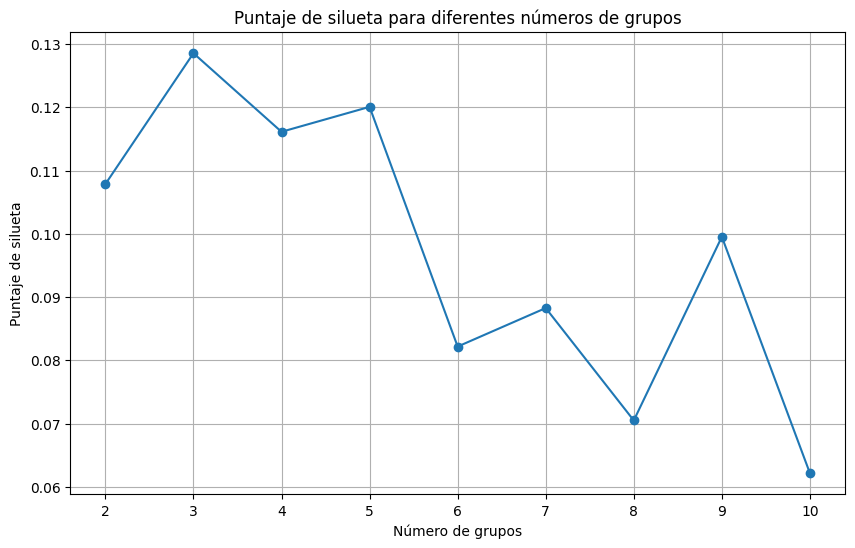

In [100]:
# Combinar los campos de texto en un solo campo
SECOP_clean = SECOP.copy()

SECOP_clean ['texto_combinado'] = SECOP['NUMERO_PROCESO'].astype(str) + ' ' +SECOP['VALOR_ESTIMADO'].astype(str) + ' '  + SECOP['TIPO_PROCESO'] + ' ' + SECOP['DESCRIPCION_CONTRATO']+ ' ' + SECOP['FECHA_PUBLICACION']+ ' ' + SECOP['licita']

# Seleccionar solo el campo combinado
textos = SECOP_clean['texto_combinado'].tolist()
SECOP_clean = SECOP_clean.dropna(subset=['texto_combinado'])
textos = SECOP_clean['texto_combinado'].tolist()

# Vectorización de texto
vectorizador = TfidfVectorizer(stop_words='english')
X = vectorizador.fit_transform(textos)

# Lista para almacenar los puntajes de silueta
silhouette_scores = []

# Calcula el puntaje de silueta para diferentes números de grupos
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Grafica los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de grupos')
plt.ylabel('Puntaje de silueta')
plt.title('Puntaje de silueta para diferentes números de grupos')
plt.xticks(np.arange(2, 11))
plt.grid(True)
plt.show()

***Pruebas con clustering : K-Means ,GMM ,DBSCAN  y K-Medoids***

In [102]:
SECOP = pd.DataFrame(SECOP)

# Convertir la columna 'VALOR_ESTIMADO' a tipo cadena
SECOP_clean['VALOR_ESTIMADO'] = SECOP_clean['VALOR_ESTIMADO'].astype(str)

# Reemplazar las comas por puntos en la columna 'VALOR_ESTIMADO'
SECOP_clean['VALOR_ESTIMADO'] = SECOP_clean['VALOR_ESTIMADO'].str.replace(',', '.')

# Convertir la columna 'VALOR_ESTIMADO' a valores numéricos
SECOP_clean['VALOR_ESTIMADO'] = SECOP_clean['VALOR_ESTIMADO'].astype(float)

# Eliminar las columnas 'NUMERO_PROCESO' y 'DESCRIPCION_CONTRATO'
SECOP_clean = SECOP_clean.drop(['NUMERO_PROCESO', 'DESCRIPCION_CONTRATO'], axis=1)
# Convertir las columnas restantes a numérico y escalar los datos
from sklearn.preprocessing import StandardScaler

X = SECOP_clean[['VALOR_ESTIMADO']]
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Mostrar los resultados
print(X_scaled)




[[ 1.24707539]
 [-0.02478594]
 [-0.2596467 ]
 [-0.2320628 ]
 [-0.02478594]
 [-0.2596467 ]
 [-0.39333666]
 [-0.11090155]
 [-0.14011981]
 [-0.08042987]
 [-0.24948144]
 [-0.26325994]
 [-0.25398595]
 [ 0.27234914]
 [ 1.53573956]
 [-0.24963143]
 [-0.24963143]
 [-0.5414796 ]
 [ 0.18719095]
 [-0.24963143]
 [ 3.27230874]
 [ 2.8819688 ]
 [-0.50011298]
 [-0.19420686]
 [ 0.22031234]
 [-0.45604649]
 [-0.16389577]
 [ 0.07638485]
 [-0.19521054]
 [-0.40687295]
 [-0.02266617]
 [ 0.07709545]
 [ 0.150095  ]
 [-0.15712094]
 [-0.36397546]
 [-0.22784294]
 [-0.19863168]
 [-0.46972455]
 [-0.25753897]
 [ 2.18505593]
 [-0.1628118 ]
 [ 3.27230874]
 [-0.48830627]
 [-0.35731505]
 [-0.47523683]
 [ 0.06012526]
 [ 7.10973333]
 [ 0.13116556]
 [ 0.60134113]
 [-0.39165049]
 [-0.33634974]
 [ 0.19844365]
 [ 0.361831  ]
 [ 1.11458984]
 [-0.15606708]
 [-0.48188643]
 [-0.4784767 ]
 [ 2.77065928]
 [-0.16998048]
 [-0.46272597]
 [-0.32468506]
 [-0.17714433]
 [-0.37165721]
 [-0.07476912]
 [-0.44392206]
 [-0.41501612]
 [-0.41501

In [103]:
# Aplicar K-Medoids
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_labels = kmedoids.fit_predict(X_scaled)
print(X_scaled)

[[ 1.24707539]
 [-0.02478594]
 [-0.2596467 ]
 [-0.2320628 ]
 [-0.02478594]
 [-0.2596467 ]
 [-0.39333666]
 [-0.11090155]
 [-0.14011981]
 [-0.08042987]
 [-0.24948144]
 [-0.26325994]
 [-0.25398595]
 [ 0.27234914]
 [ 1.53573956]
 [-0.24963143]
 [-0.24963143]
 [-0.5414796 ]
 [ 0.18719095]
 [-0.24963143]
 [ 3.27230874]
 [ 2.8819688 ]
 [-0.50011298]
 [-0.19420686]
 [ 0.22031234]
 [-0.45604649]
 [-0.16389577]
 [ 0.07638485]
 [-0.19521054]
 [-0.40687295]
 [-0.02266617]
 [ 0.07709545]
 [ 0.150095  ]
 [-0.15712094]
 [-0.36397546]
 [-0.22784294]
 [-0.19863168]
 [-0.46972455]
 [-0.25753897]
 [ 2.18505593]
 [-0.1628118 ]
 [ 3.27230874]
 [-0.48830627]
 [-0.35731505]
 [-0.47523683]
 [ 0.06012526]
 [ 7.10973333]
 [ 0.13116556]
 [ 0.60134113]
 [-0.39165049]
 [-0.33634974]
 [ 0.19844365]
 [ 0.361831  ]
 [ 1.11458984]
 [-0.15606708]
 [-0.48188643]
 [-0.4784767 ]
 [ 2.77065928]
 [-0.16998048]
 [-0.46272597]
 [-0.32468506]
 [-0.17714433]
 [-0.37165721]
 [-0.07476912]
 [-0.44392206]
 [-0.41501612]
 [-0.41501

In [104]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
print(X_scaled)

[[ 1.24707539]
 [-0.02478594]
 [-0.2596467 ]
 [-0.2320628 ]
 [-0.02478594]
 [-0.2596467 ]
 [-0.39333666]
 [-0.11090155]
 [-0.14011981]
 [-0.08042987]
 [-0.24948144]
 [-0.26325994]
 [-0.25398595]
 [ 0.27234914]
 [ 1.53573956]
 [-0.24963143]
 [-0.24963143]
 [-0.5414796 ]
 [ 0.18719095]
 [-0.24963143]
 [ 3.27230874]
 [ 2.8819688 ]
 [-0.50011298]
 [-0.19420686]
 [ 0.22031234]
 [-0.45604649]
 [-0.16389577]
 [ 0.07638485]
 [-0.19521054]
 [-0.40687295]
 [-0.02266617]
 [ 0.07709545]
 [ 0.150095  ]
 [-0.15712094]
 [-0.36397546]
 [-0.22784294]
 [-0.19863168]
 [-0.46972455]
 [-0.25753897]
 [ 2.18505593]
 [-0.1628118 ]
 [ 3.27230874]
 [-0.48830627]
 [-0.35731505]
 [-0.47523683]
 [ 0.06012526]
 [ 7.10973333]
 [ 0.13116556]
 [ 0.60134113]
 [-0.39165049]
 [-0.33634974]
 [ 0.19844365]
 [ 0.361831  ]
 [ 1.11458984]
 [-0.15606708]
 [-0.48188643]
 [-0.4784767 ]
 [ 2.77065928]
 [-0.16998048]
 [-0.46272597]
 [-0.32468506]
 [-0.17714433]
 [-0.37165721]
 [-0.07476912]
 [-0.44392206]
 [-0.41501612]
 [-0.41501

In [105]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_scaled)
print(X_scaled)

[[ 1.24707539]
 [-0.02478594]
 [-0.2596467 ]
 [-0.2320628 ]
 [-0.02478594]
 [-0.2596467 ]
 [-0.39333666]
 [-0.11090155]
 [-0.14011981]
 [-0.08042987]
 [-0.24948144]
 [-0.26325994]
 [-0.25398595]
 [ 0.27234914]
 [ 1.53573956]
 [-0.24963143]
 [-0.24963143]
 [-0.5414796 ]
 [ 0.18719095]
 [-0.24963143]
 [ 3.27230874]
 [ 2.8819688 ]
 [-0.50011298]
 [-0.19420686]
 [ 0.22031234]
 [-0.45604649]
 [-0.16389577]
 [ 0.07638485]
 [-0.19521054]
 [-0.40687295]
 [-0.02266617]
 [ 0.07709545]
 [ 0.150095  ]
 [-0.15712094]
 [-0.36397546]
 [-0.22784294]
 [-0.19863168]
 [-0.46972455]
 [-0.25753897]
 [ 2.18505593]
 [-0.1628118 ]
 [ 3.27230874]
 [-0.48830627]
 [-0.35731505]
 [-0.47523683]
 [ 0.06012526]
 [ 7.10973333]
 [ 0.13116556]
 [ 0.60134113]
 [-0.39165049]
 [-0.33634974]
 [ 0.19844365]
 [ 0.361831  ]
 [ 1.11458984]
 [-0.15606708]
 [-0.48188643]
 [-0.4784767 ]
 [ 2.77065928]
 [-0.16998048]
 [-0.46272597]
 [-0.32468506]
 [-0.17714433]
 [-0.37165721]
 [-0.07476912]
 [-0.44392206]
 [-0.41501612]
 [-0.41501

In [106]:
# Aplicar Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(X_scaled)
print(X_scaled)

[[ 1.24707539]
 [-0.02478594]
 [-0.2596467 ]
 [-0.2320628 ]
 [-0.02478594]
 [-0.2596467 ]
 [-0.39333666]
 [-0.11090155]
 [-0.14011981]
 [-0.08042987]
 [-0.24948144]
 [-0.26325994]
 [-0.25398595]
 [ 0.27234914]
 [ 1.53573956]
 [-0.24963143]
 [-0.24963143]
 [-0.5414796 ]
 [ 0.18719095]
 [-0.24963143]
 [ 3.27230874]
 [ 2.8819688 ]
 [-0.50011298]
 [-0.19420686]
 [ 0.22031234]
 [-0.45604649]
 [-0.16389577]
 [ 0.07638485]
 [-0.19521054]
 [-0.40687295]
 [-0.02266617]
 [ 0.07709545]
 [ 0.150095  ]
 [-0.15712094]
 [-0.36397546]
 [-0.22784294]
 [-0.19863168]
 [-0.46972455]
 [-0.25753897]
 [ 2.18505593]
 [-0.1628118 ]
 [ 3.27230874]
 [-0.48830627]
 [-0.35731505]
 [-0.47523683]
 [ 0.06012526]
 [ 7.10973333]
 [ 0.13116556]
 [ 0.60134113]
 [-0.39165049]
 [-0.33634974]
 [ 0.19844365]
 [ 0.361831  ]
 [ 1.11458984]
 [-0.15606708]
 [-0.48188643]
 [-0.4784767 ]
 [ 2.77065928]
 [-0.16998048]
 [-0.46272597]
 [-0.32468506]
 [-0.17714433]
 [-0.37165721]
 [-0.07476912]
 [-0.44392206]
 [-0.41501612]
 [-0.41501

In [107]:

# Mostrar resultados para variable Valor_estimado
print("K-Means labels:", kmeans_labels)
print("GMM labels:", gmm_labels)
print("DBSCAN labels:", dbscan_labels)
print("K-Medoids labels:", kmedoids_labels)

K-Means labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
GMM labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
DBSCAN labels: [ 0  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  2  3  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  2  1  1  1  1 -1  1
  1  1  1  1  1  0  1  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
K-Medoids labels: [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1
 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1
 0 1 

In [127]:
# Combinar los campos de texto en un solo campo
SECOP_clean['texto_combinado'] = SECOP['NUMERO_PROCESO'].astype(str) + ' ' + SECOP['TIPO_PROCESO'] + ' ' + SECOP['DESCRIPCION_CONTRATO']+ ' ' + SECOP['FECHA_PUBLICACION']+ ' ' + SECOP['licita']

# Seleccionar solo el campo combinado
textos = SECOP_clean['texto_combinado'].tolist()
SECOP_clean = SECOP_clean.dropna(subset=['texto_combinado'])
textos = SECOP_clean['texto_combinado'].tolist()

# Vectorización de texto con palabras clave
vectorizador = TfidfVectorizer(stop_words='english', vocabulary=['servicios', 'licitación', 'pública', 'contratación', 'especial', 'prestación'])
X = vectorizador.fit_transform(textos)

# Aplicar K-Means
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_labels2 = kmeans.fit_predict(X_scaled)
print(X_scaled)




[[ 1.24707539]
 [-0.02478594]
 [-0.2596467 ]
 [-0.2320628 ]
 [-0.02478594]
 [-0.2596467 ]
 [-0.39333666]
 [-0.11090155]
 [-0.14011981]
 [-0.08042987]
 [-0.24948144]
 [-0.26325994]
 [-0.25398595]
 [ 0.27234914]
 [ 1.53573956]
 [-0.24963143]
 [-0.24963143]
 [-0.5414796 ]
 [ 0.18719095]
 [-0.24963143]
 [ 3.27230874]
 [ 2.8819688 ]
 [-0.50011298]
 [-0.19420686]
 [ 0.22031234]
 [-0.45604649]
 [-0.16389577]
 [ 0.07638485]
 [-0.19521054]
 [-0.40687295]
 [-0.02266617]
 [ 0.07709545]
 [ 0.150095  ]
 [-0.15712094]
 [-0.36397546]
 [-0.22784294]
 [-0.19863168]
 [-0.46972455]
 [-0.25753897]
 [ 2.18505593]
 [-0.1628118 ]
 [ 3.27230874]
 [-0.48830627]
 [-0.35731505]
 [-0.47523683]
 [ 0.06012526]
 [ 7.10973333]
 [ 0.13116556]
 [ 0.60134113]
 [-0.39165049]
 [-0.33634974]
 [ 0.19844365]
 [ 0.361831  ]
 [ 1.11458984]
 [-0.15606708]
 [-0.48188643]
 [-0.4784767 ]
 [ 2.77065928]
 [-0.16998048]
 [-0.46272597]
 [-0.32468506]
 [-0.17714433]
 [-0.37165721]
 [-0.07476912]
 [-0.44392206]
 [-0.41501612]
 [-0.41501

In [128]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan_labels2 = dbscan.fit_predict(X)
print(X)

  (0, 5)	0.680812406639353
  (0, 4)	0.5271216821577284
  (0, 3)	0.2298665977601182
  (0, 0)	0.45365024677534016
  (1, 3)	0.45199161025117957
  (1, 0)	0.8920221882120118
  (2, 3)	0.45199161025117957
  (2, 0)	0.8920221882120118
  (3, 4)	0.4907142340719452
  (3, 3)	0.2139900809939137
  (3, 0)	0.8446347054883565
  (4, 3)	0.45199161025117957
  (4, 0)	0.8920221882120118
  (5, 3)	0.45199161025117957
  (5, 0)	0.8920221882120118
  (6, 3)	0.45199161025117957
  (6, 0)	0.8920221882120118
  (7, 3)	0.45199161025117957
  (7, 0)	0.8920221882120118
  (8, 3)	0.45199161025117957
  (8, 0)	0.8920221882120118
  (9, 3)	0.45199161025117957
  (9, 0)	0.8920221882120118
  (10, 3)	0.45199161025117957
  (10, 0)	0.8920221882120118
  :	:
  (90, 4)	0.9166350543512013
  (90, 3)	0.39972512697423757
  (91, 3)	1.0
  (92, 3)	1.0
  (93, 3)	1.0
  (94, 3)	1.0
  (95, 3)	1.0
  (96, 3)	1.0
  (97, 4)	0.9166350543512013
  (97, 3)	0.39972512697423757
  (98, 3)	1.0
  (99, 3)	1.0
  (100, 3)	1.0
  (101, 3)	1.0
  (102, 4)	0.9166350543

In [129]:
# Aplicar K-Medoids
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_labels2 = kmedoids.fit_predict(X)
print(X)

  (0, 5)	0.680812406639353
  (0, 4)	0.5271216821577284
  (0, 3)	0.2298665977601182
  (0, 0)	0.45365024677534016
  (1, 3)	0.45199161025117957
  (1, 0)	0.8920221882120118
  (2, 3)	0.45199161025117957
  (2, 0)	0.8920221882120118
  (3, 4)	0.4907142340719452
  (3, 3)	0.2139900809939137
  (3, 0)	0.8446347054883565
  (4, 3)	0.45199161025117957
  (4, 0)	0.8920221882120118
  (5, 3)	0.45199161025117957
  (5, 0)	0.8920221882120118
  (6, 3)	0.45199161025117957
  (6, 0)	0.8920221882120118
  (7, 3)	0.45199161025117957
  (7, 0)	0.8920221882120118
  (8, 3)	0.45199161025117957
  (8, 0)	0.8920221882120118
  (9, 3)	0.45199161025117957
  (9, 0)	0.8920221882120118
  (10, 3)	0.45199161025117957
  (10, 0)	0.8920221882120118
  :	:
  (90, 4)	0.9166350543512013
  (90, 3)	0.39972512697423757
  (91, 3)	1.0
  (92, 3)	1.0
  (93, 3)	1.0
  (94, 3)	1.0
  (95, 3)	1.0
  (96, 3)	1.0
  (97, 4)	0.9166350543512013
  (97, 3)	0.39972512697423757
  (98, 3)	1.0
  (99, 3)	1.0
  (100, 3)	1.0
  (101, 3)	1.0
  (102, 4)	0.9166350543

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


In [130]:
# Aplicar Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels2 = gmm.fit_predict(X.toarray())
print(X)

  (0, 5)	0.680812406639353
  (0, 4)	0.5271216821577284
  (0, 3)	0.2298665977601182
  (0, 0)	0.45365024677534016
  (1, 3)	0.45199161025117957
  (1, 0)	0.8920221882120118
  (2, 3)	0.45199161025117957
  (2, 0)	0.8920221882120118
  (3, 4)	0.4907142340719452
  (3, 3)	0.2139900809939137
  (3, 0)	0.8446347054883565
  (4, 3)	0.45199161025117957
  (4, 0)	0.8920221882120118
  (5, 3)	0.45199161025117957
  (5, 0)	0.8920221882120118
  (6, 3)	0.45199161025117957
  (6, 0)	0.8920221882120118
  (7, 3)	0.45199161025117957
  (7, 0)	0.8920221882120118
  (8, 3)	0.45199161025117957
  (8, 0)	0.8920221882120118
  (9, 3)	0.45199161025117957
  (9, 0)	0.8920221882120118
  (10, 3)	0.45199161025117957
  (10, 0)	0.8920221882120118
  :	:
  (90, 4)	0.9166350543512013
  (90, 3)	0.39972512697423757
  (91, 3)	1.0
  (92, 3)	1.0
  (93, 3)	1.0
  (94, 3)	1.0
  (95, 3)	1.0
  (96, 3)	1.0
  (97, 4)	0.9166350543512013
  (97, 3)	0.39972512697423757
  (98, 3)	1.0
  (99, 3)	1.0
  (100, 3)	1.0
  (101, 3)	1.0
  (102, 4)	0.9166350543

In [131]:

# Mostrar resultados para variables NUMERO_PROCESO,TIPO_PROCESO,DESCRIPCION_CONTRATO
print("K-Means labels:", kmeans_labels2)
print("GMM labels:", gmm_labels2)
print("DBSCAN labels:", dbscan_labels2)
print("K-Medoids labels:", kmedoids_labels2)



K-Means labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
GMM labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
DBSCAN labels: [ 0  1  1 -1  1  1  1  1  1  1  1  1  0  1  2  0  0 -1  1  0  3  4  1  1
  1  0  1  1  1  2 -1  1  1  1  0  1  1 -1  2  4  4  3  2  0  5  4 -1  4
  5  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  4  5  4  4  4  4  5  5  5  5  5
  5  4  5  5  5  5  4  5  5  5  5  4  4  5]
K-Medoids labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

In [132]:
# Combinar los campos de texto en un solo campo
SECOP_clean['texto_combinado'] = SECOP['DESCRIPCION_CONTRATO'.'licita']

# Seleccionar solo el campo combinado
textos = SECOP_clean['texto_combinado'].tolist()
SECOP_clean = SECOP_clean.dropna(subset=['texto_combinado'])
textos = SECOP_clean['texto_combinado'].tolist()

# Vectorización de texto con palabras clave
vectorizador = TfidfVectorizer(stop_words='english', vocabulary=['servicios', 'licitación', 'pública', 'contratación', 'especial', 'prestación'])
X = vectorizador.fit_transform(textos)

# Aplicar K-Means para agrupar en k=2 grupos
k = 2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(X)
print(X)
# Obtener los grupos asignados para cada texto
grupos = kmeans.labels_

print(grupos)

  (0, 5)	0.8321770324893757
  (0, 0)	0.5545100419263627
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 5)	0.5199387344019766
  (12, 3)	0.7807901011047141
  (12, 0)	0.3464542256710994
  (13, 0)	1.0
  (14, 5)	0.8321770324893757
  (14, 0)	0.5545100419263627
  (15, 5)	0.8321770324893757
  (15, 0)	0.5545100419263627
  (16, 5)	0.8321770324893757
  (16, 0)	0.5545100419263627
  (18, 0)	1.0
  (19, 5)	0.8321770324893757
  :	:
  (25, 5)	0.8321770324893757
  (25, 0)	0.5545100419263627
  (26, 0)	1.0
  (27, 0)	1.0
  (28, 0)	1.0
  (29, 5)	0.8321770324893757
  (29, 0)	0.5545100419263627
  (30, 0)	1.0
  (31, 0)	1.0
  (32, 0)	1.0
  (33, 0)	1.0
  (34, 5)	0.5199387344019766
  (34, 3)	0.7807901011047141
  (34, 0)	0.3464542256710994
  (35, 0)	1.0
  (36, 0)	1.0
  (37, 5)	0.6001901426590853
  (37, 0)	0.7998573576925243
  (38, 5)	0.8321770324893757
  (38, 0)	0.5545100419263627
  (41, 2)	1.0
  (42, 5)	0.8321

In [133]:
# Combinar los campos de texto en un solo campo
SECOP_clean['texto_combinado'] = SECOP['TIPO_PROCESO']

# Seleccionar solo el campo combinado
textos = SECOP_clean['texto_combinado'].tolist()
SECOP_clean = SECOP_clean.dropna(subset=['texto_combinado'])
textos = SECOP_clean['texto_combinado'].tolist()

# Vectorización de texto con palabras clave
vectorizador = TfidfVectorizer(stop_words='english', vocabulary=['servicios', 'licitación', 'pública', 'contratación', 'especial', 'prestación'])
X = vectorizador.fit_transform(textos)

# Aplicar K-Means para agrupar en k=2 grupos
k = 2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(X)
print(X)
# Obtener los grupos asignados para cada texto
grupos = kmeans.labels_

print(grupos)

  (0, 4)	0.9166350543512013
  (0, 3)	0.39972512697423757
  (1, 3)	1.0
  (2, 3)	1.0
  (3, 4)	0.9166350543512013
  (3, 3)	0.39972512697423757
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 3)	1.0
  (7, 3)	1.0
  (8, 3)	1.0
  (9, 3)	1.0
  (10, 3)	1.0
  (11, 3)	1.0
  (12, 4)	0.9166350543512013
  (12, 3)	0.39972512697423757
  (13, 3)	1.0
  (14, 3)	1.0
  (15, 4)	0.9166350543512013
  (15, 3)	0.39972512697423757
  (16, 4)	0.9166350543512013
  (16, 3)	0.39972512697423757
  (18, 3)	1.0
  (19, 4)	0.9166350543512013
  (19, 3)	0.39972512697423757
  :	:
  (90, 4)	0.9166350543512013
  (90, 3)	0.39972512697423757
  (91, 3)	1.0
  (92, 3)	1.0
  (93, 3)	1.0
  (94, 3)	1.0
  (95, 3)	1.0
  (96, 3)	1.0
  (97, 4)	0.9166350543512013
  (97, 3)	0.39972512697423757
  (98, 3)	1.0
  (99, 3)	1.0
  (100, 3)	1.0
  (101, 3)	1.0
  (102, 4)	0.9166350543512013
  (102, 3)	0.39972512697423757
  (103, 3)	1.0
  (104, 3)	1.0
  (105, 3)	1.0
  (106, 3)	1.0
  (107, 4)	0.9166350543512013
  (107, 3)	0.39972512697423757
  (108, 4)	0.916635054351201

# **Gaussian Mixture Models (GMM)**

***Dataframe SECOP***

In [134]:
SECOP.columns

Index(['NUMERO_PROCESO', 'TIPO_PROCESO', 'VALOR_ESTIMADO', 'FECHA_PUBLICACION',
       'FECHA_PRESENTACION', 'DESCRIPCION_CONTRATO', 'CODIGO_UNSPSC',
       'licita'],
      dtype='object')

In [135]:
SECOP
SECOP.to_csv('SECOP_encoded.csv', index=False)


***Instalar librerias***

In [136]:
!pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


***Clustering GaussianMixture***

In [137]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture
import pandas as pd

# Codificar los campos no numéricos
encoder = OneHotEncoder()
SECOP_encoded = pd.get_dummies(SECOP[['TIPO_PROCESO', 'licita']])

# Convertir fechas a formato numérico
fecha_referencia = pd.to_datetime('1900-01-01')
SECOP_encoded['FECHA_PUBLICACION'] = (pd.to_datetime(SECOP['FECHA_PUBLICACION'], format='%d/%m/%Y') - fecha_referencia).dt.days

# Convertir la columna 'VALOR_ESTIMADO' a tipo cadena y limpiarla
SECOP['VALOR_ESTIMADO'] = SECOP['VALOR_ESTIMADO'].astype(str)
SECOP['VALOR_ESTIMADO'] = SECOP['VALOR_ESTIMADO'].str.replace(',', '.')
SECOP['VALOR_ESTIMADO'] = pd.to_numeric(SECOP['VALOR_ESTIMADO'], errors='coerce')

# Convertir la columna 'CODIGO_UNSPSC' a tipo cadena y limpiarla
SECOP['CODIGO_UNSPSC'] = SECOP['CODIGO_UNSPSC'].astype(str)
SECOP['CODIGO_UNSPSC'] = SECOP['CODIGO_UNSPSC'].str.replace('[^0-9]', '', regex=True)
SECOP['CODIGO_UNSPSC'] = pd.to_numeric(SECOP['CODIGO_UNSPSC'], errors='coerce')

# Concatenar los campos codificados y 'CODIGO_UNSPSC' con el DataFrame original
SECOP_final = pd.concat([SECOP_encoded, SECOP[['VALOR_ESTIMADO', 'CODIGO_UNSPSC']]], axis=1)

# Imputar valores faltantes en el DataFrame final
imputer_final = SimpleImputer(strategy='mean')
SECOP_final_imputed = imputer_final.fit_transform(SECOP_final)

# Aplicar GMM a los campos numéricos
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(SECOP_final_imputed)

# Imprimir las etiquetas de los clústeres
print(gmm_labels)





[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


***Datos generados por clustering***

In [138]:
SECOP_final

,TIPO_PROCESO_CONTRATACIÓN DIRECTA (CON OFERTAS),TIPO_PROCESO_CONTRATACIÓN DIRECTA.,TIPO_PROCESO_CONTRATACIÓN RÉGIMEN ESPECIAL,TIPO_PROCESO_LICITACIÓN PÚBLICA,TIPO_PROCESO_LICITACIÓN PÚBLICA (OBRA PÚBLICA),TIPO_PROCESO_SOLICITUD DE INFORMACIÓN A LOS PROVEEDORES,licita_SIN_DATO,FECHA_PUBLICACION,VALOR_ESTIMADO,CODIGO_UNSPSC
0,False,False,True,False,False,False,True,45329,297000000.0,85161500
1,False,True,False,False,False,False,True,45329,85800000.0,80101500
2,False,True,False,False,False,False,True,45329,46800000.0,80101500
3,False,False,True,False,False,False,True,45328,51380467.0,80111620
4,False,True,False,False,False,False,True,45327,85800000.0,80101500
...,...,...,...,...,...,...,...,...,...,...
105,False,True,False,False,False,False,True,45389,21000000.0,80101500
106,False,True,False,False,False,False,True,45389,24000000.0,80101500
107,False,False,True,False,False,False,True,45389,300000.0,80111600
108,False,False,True,False,False,False,True,45388,7500000.0,81111500


***Agrupación con Gaussian Mixture Model (GMM)***

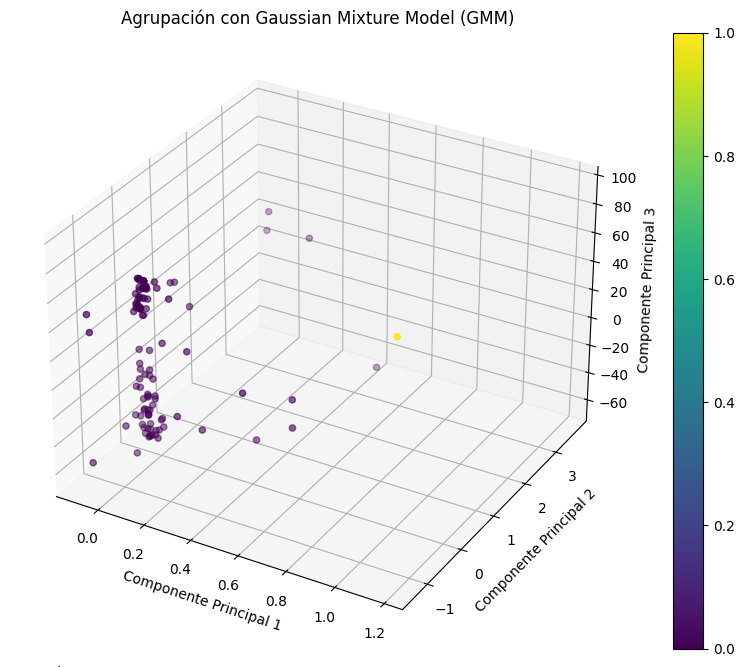

In [139]:
# Reducir la dimensionalidad a 2 componentes usando PCA
pca = PCA(n_components=8)
pca_result = pca.fit_transform(SECOP_final_imputed)

# Crear un DataFrame con todos los componentes y las etiquetas de los clústeres
pca_df_all_components = pd.DataFrame(pca_result, columns=['Componente_1', 'Componente_2','Componente_3', 'Componente_4','Componente_5', 'Componente_6','Componente_7', 'Componente_8'])
pca_df_all_components['Cluster'] = gmm_labels

# Graficar los datos coloreados por los clústeres
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df_all_components['Componente_1'], pca_df_all_components['Componente_2'], pca_df_all_components['Componente_3'], c=pca_df_all_components['Cluster'], cmap='viridis')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Agrupación con Gaussian Mixture Model (GMM)')
plt.colorbar(scatter)
plt.show()


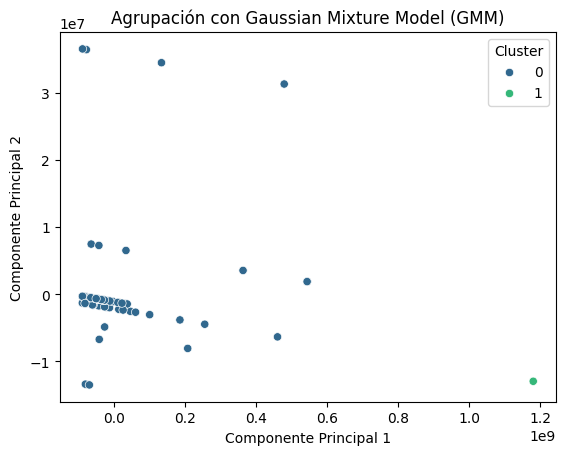

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que gmm_labels contiene las etiquetas de los clústeres obtenidas con GMM
sns.scatterplot(x=pca_df['Componente_1'], y=pca_df['Componente_2'], hue=gmm_labels, palette='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Agrupación con Gaussian Mixture Model (GMM)')
plt.legend(title='Cluster', loc='upper right')
plt.show()



# **ARBOL DE DECISIÓN**

***Precisión del modelo de árbol de decisión sobre datos de prueba***

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(SECOP_final_imputed, gmm_labels, test_size=0.3, random_state=123)

# Crear el árbol de decisión
arbol_gmm = DecisionTreeClassifier(random_state=123)
arbol_gmm.fit(X_train, y_train)

# Predecir los clústeres para los datos de prueba
y_pred = arbol_gmm.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo de árbol de decisión sobre datos de prueba: {:.2f}".format(precision))




Precisión del modelo de árbol de decisión sobre datos de prueba: 1.00


***Visualizar el árbol de decisión***

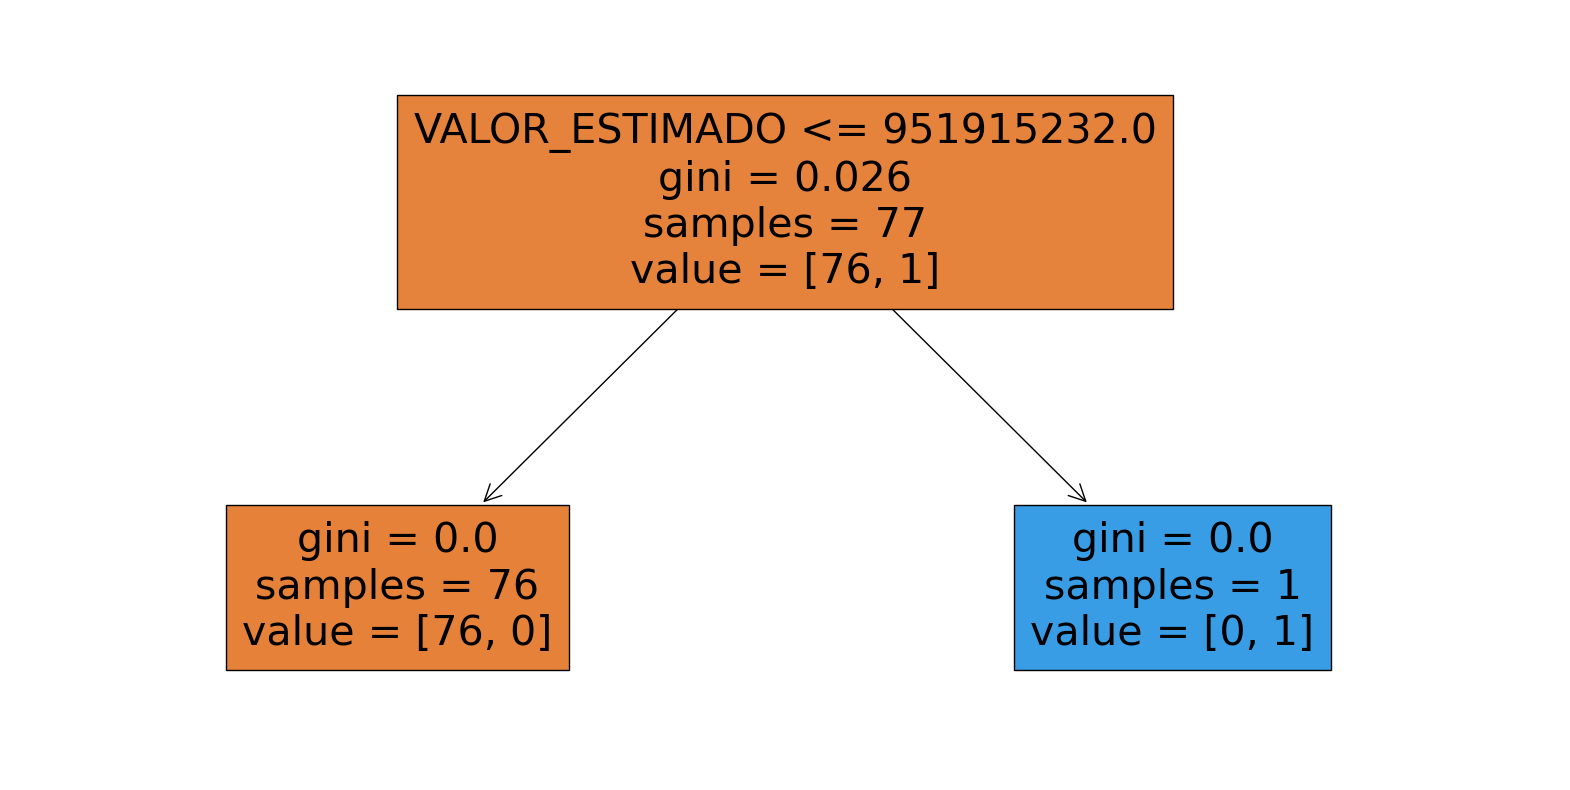

In [146]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(arbol_gmm, filled=True, feature_names=SECOP_final.columns)
plt.show()

***Predecir el conjunto de prueba con GMM***

In [155]:

# Predecir el conjunto de prueba con GMM
prediccion = gmm.predict(SECOP_final_imputed)

# Ver los resultados
print(prediccion)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


***Matriz de confusión***

In [156]:
from sklearn.metrics import confusion_matrix

# Predecir el conjunto de prueba con GMM
prediccion = gmm.predict(SECOP_final_imputed)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(gmm_labels, prediccion)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(matriz_confusion)


Matriz de Confusión:
[[109   0]
 [  0   1]]
